# Plotting Code

We will be using Seaborn in this section to make visualizations. As mentioned in lecture, Seaborn has great documentation, so you should take this time to read about some of the functions you might need in this class below. Feel free to look at some of the examples included in the links below to determine whether or not you might need to use the function.


Here's some seaborn functions you might need for this section:

* [Bar/Violin Plot](https://seaborn.pydata.org/generated/seaborn.catplot.html)
* [Plot a Distribution](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
* [Scatter/Line Plot](https://seaborn.pydata.org/generated/seaborn.relplot.html)
* [Linear Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
* [Compare Two Variables](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
* [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)


Note: The Seaborn library has been included at the top and is in a variable named `sns`

## Problem: Line Chart

Create a function called `plot_line` that accepts a Pandas dataframe and creates and displays a line chart using Seaborn.

You should generate a line plot, where the years are on the x axis and the count is on the y axis, of the number of cancer deaths (Event Type = Mortality) for each year between 2002 - 2008 (inclusive) for both sexes and all races *in the state of Washington*.

**Please provide a descriptive title and axis labels for your generated visualization.**

**NOTE:** the information you're plotting in this problem is constrained to a single area (*only* Washington). This means that you should be able to look up the exact row that corresponds to mortality counts for all races and both sexes in the state of Washington directly **without needing a groupby** (there's nothing to aggregate in this case, since you can look it up directly in the dataframe). Most of the logic for filtering the correct data will be the same as in problem 1.4, so feel free to copy over relevant parts of your solution here.

In [227]:
# Setup
%pip install -qq seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cancer.csv')
df.head()

Note: you may need to restart the kernel to use updated packages.


,Area,Count,Event Type,Population,Race,Sex,Year
0,Alabama,4366,Mortality,2293259,All Races,Female,1999
1,Alabama,9452,Incidence,2302835,All Races,Female,2000
2,Alabama,4425,Mortality,2302835,All Races,Female,2000
3,Alabama,9938,Incidence,2309496,All Races,Female,2001
4,Alabama,4550,Mortality,2309496,All Races,Female,2001


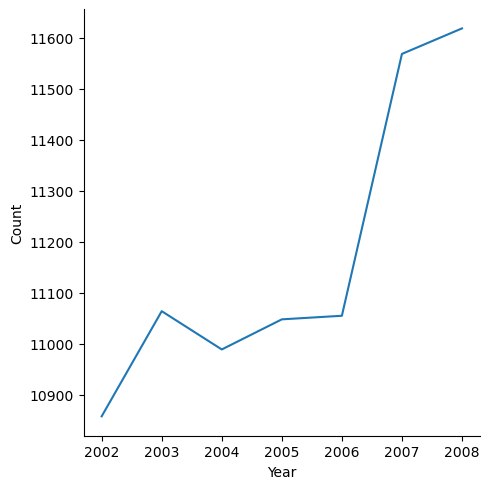

In [228]:
import pandas as pd
def plot_line(df:pd.DataFrame) -> None:
    # Type your solution here
    time1 = df["Year"] <= 2008
    time2 = df["Year"] >= 2002
    df = df[time1 & time2].copy()
    df = df[df["Sex"] == "Male and Female"]
    df = df[df["Race"] == "All Races"]
    wash = df["Area"] == "Washington"
    df = df[wash]
    mort = df["Event Type"] == "Mortality"
    df = df[mort]
    sns.relplot(df,x = "Year", y = "Count", kind = "line")
    

plot_line(df)

## Problem: Regression Plot

Create a function called `plot_regression` that accepts a Pandas dataframe and crates a linear regression plot between Population and Count for cancer incidence (Event Type = Incidence). Remember that we need to pass in 'Population' and 'Count' as X and Y to the `regplot` function!

**Please provide a descriptive title and axis labels for your generated visualization.**

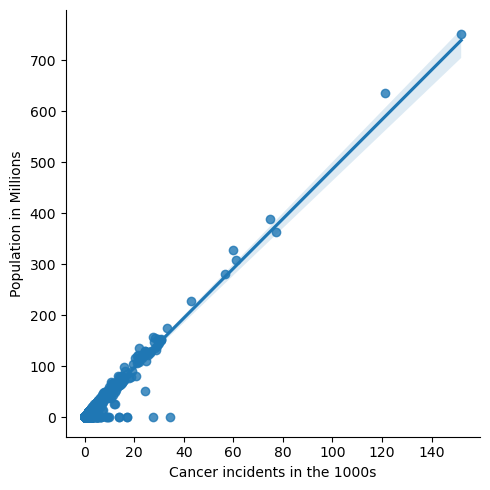

In [229]:
import pandas as pd
def plot_regression(df:pd.DataFrame) -> None:
    # Type your solution here
    df = df[df["Event Type"] == "Incidence"].copy()
    df["Count"] = df["Count"]/10000
    df["Population"] = df["Population"]/10000000
    sns.lmplot(df, x = "Population", y = "Count")
    plt.ylabel("Population in Millions")
    plt.xlabel("Cancer incidents in the 1000s")
    
plot_regression(df)

## Problem: Playing with Seaborn

For this problem, we will be progressively be adding to a plot to explore some of the other arguments you can use with seaborn. We will be focusing on the `relplot` function from seaborn the the various arguments you can use with this function. Remember, for each visualization you create, make sure to provide a **descriptive title** and **axis labels** so that we can understand what you are visualizing.

Every function in this problem will take in the cancer dataset as a dataframe and produce a seaborns plot.

### Problem - A basic `relplot`
Create a function called `plot_problem_play` which plots the general count of cancer events over the years. Remember, that you will want to be using the `relplot` function.

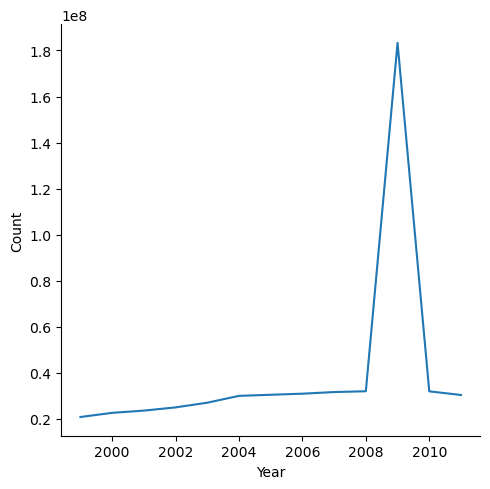

In [230]:
import pandas as pd

def plot_problem_play(df:pd.DataFrame) -> None:
    # Type your solution here
    df = df.groupby("Year")["Count"].sum()
    df = pd.DataFrame(df)
    sns.relplot(df, x = "Year", y = "Count", kind = "line")


plot_problem_play(df)

#### Problem - Analyzing the `relplot`
The graph that we just created in the previous problem showcased a peculiar spike at the year 2009. Since this is interesting, we should try to focus in on this year and try to visualize other aspects of the data.

Create a function `plot_problem_relplot` which plots the general count of cancer events over the population of the areas in the year 2009. 

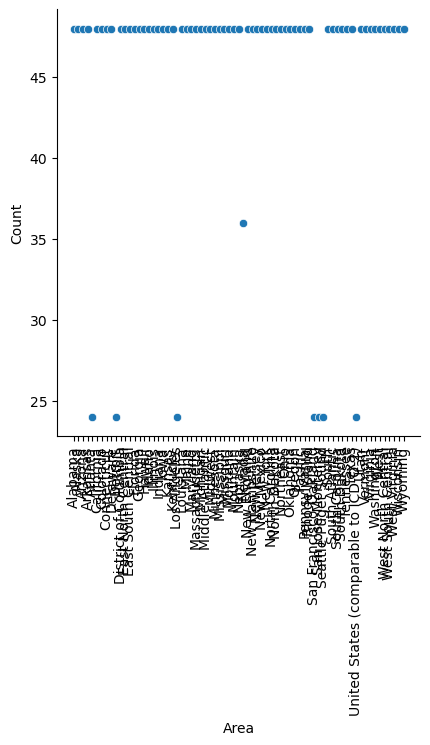

In [ ]:
import pandas as pd
import numpy as np
def plot_problem_relplot(df:pd.DataFrame) -> None:
    # Type your solution here
    df = df[df["Year"] == 2009].copy()
    df = df.groupby("Area")["Count"].sum()
    df = pd.DataFrame(df)
    sns.relplot(df, x = "Area", y = "Count", kind = "scatter")
    plt.xticks(rotation = 90)

plot_problem_relplot(df)

### Problem - Adding in extra `seaborn` *flare*
It looks like we can see a bit more detail of what is going on with our data in the year 2009, but we definitely are missing some details. We should see if we can encode more data within our visualizations.

Create a function `plot_problem_flare` which plots the general count of cancer events over race. Each point should have the hue correlated with the type of cancer event (which is either 'Mortality' or 'Incidence') and the size correlated with the population.

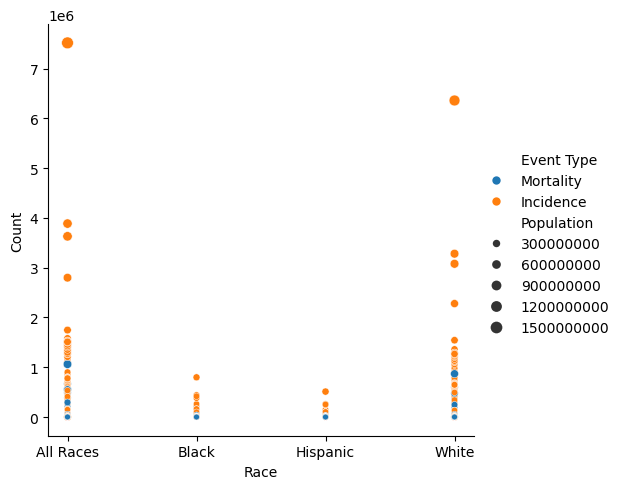

In [255]:
import pandas as pd

def plot_problem_flare(df:pd.DataFrame) -> None:
    # Type your solution here
    sns.relplot(df, x = "Race", y ="Count", hue = "Event Type", size = "Population")

plot_problem_flare(df)

### Problem - Thoughts and Bonus!
This last plot is pretty different then the other plots that we have plotted mostly due to the extra information we have plotted. Recall the lecture we had on three types of data, Quantitative, Ordinal, and Nominal, and a hierachy of ways to encode that data. In this last plot, we can actually see the hierachy in play (try to look at each column and mark which type of data it is)!

As a bonus, create a function `plot_problem_bonus` that uses some of the seaborn features we haven't talked about yet. You should look through the seaborn documentation for the `relplot` function and see if there are any other arguments you could use to personalize your plot! There might be a cool way to *color* the points or perhaps a way to place plots side-by-side (the solution will showcase one such example). It may be helpful to look at the example plots in the documentation to see what seaborn showcases.

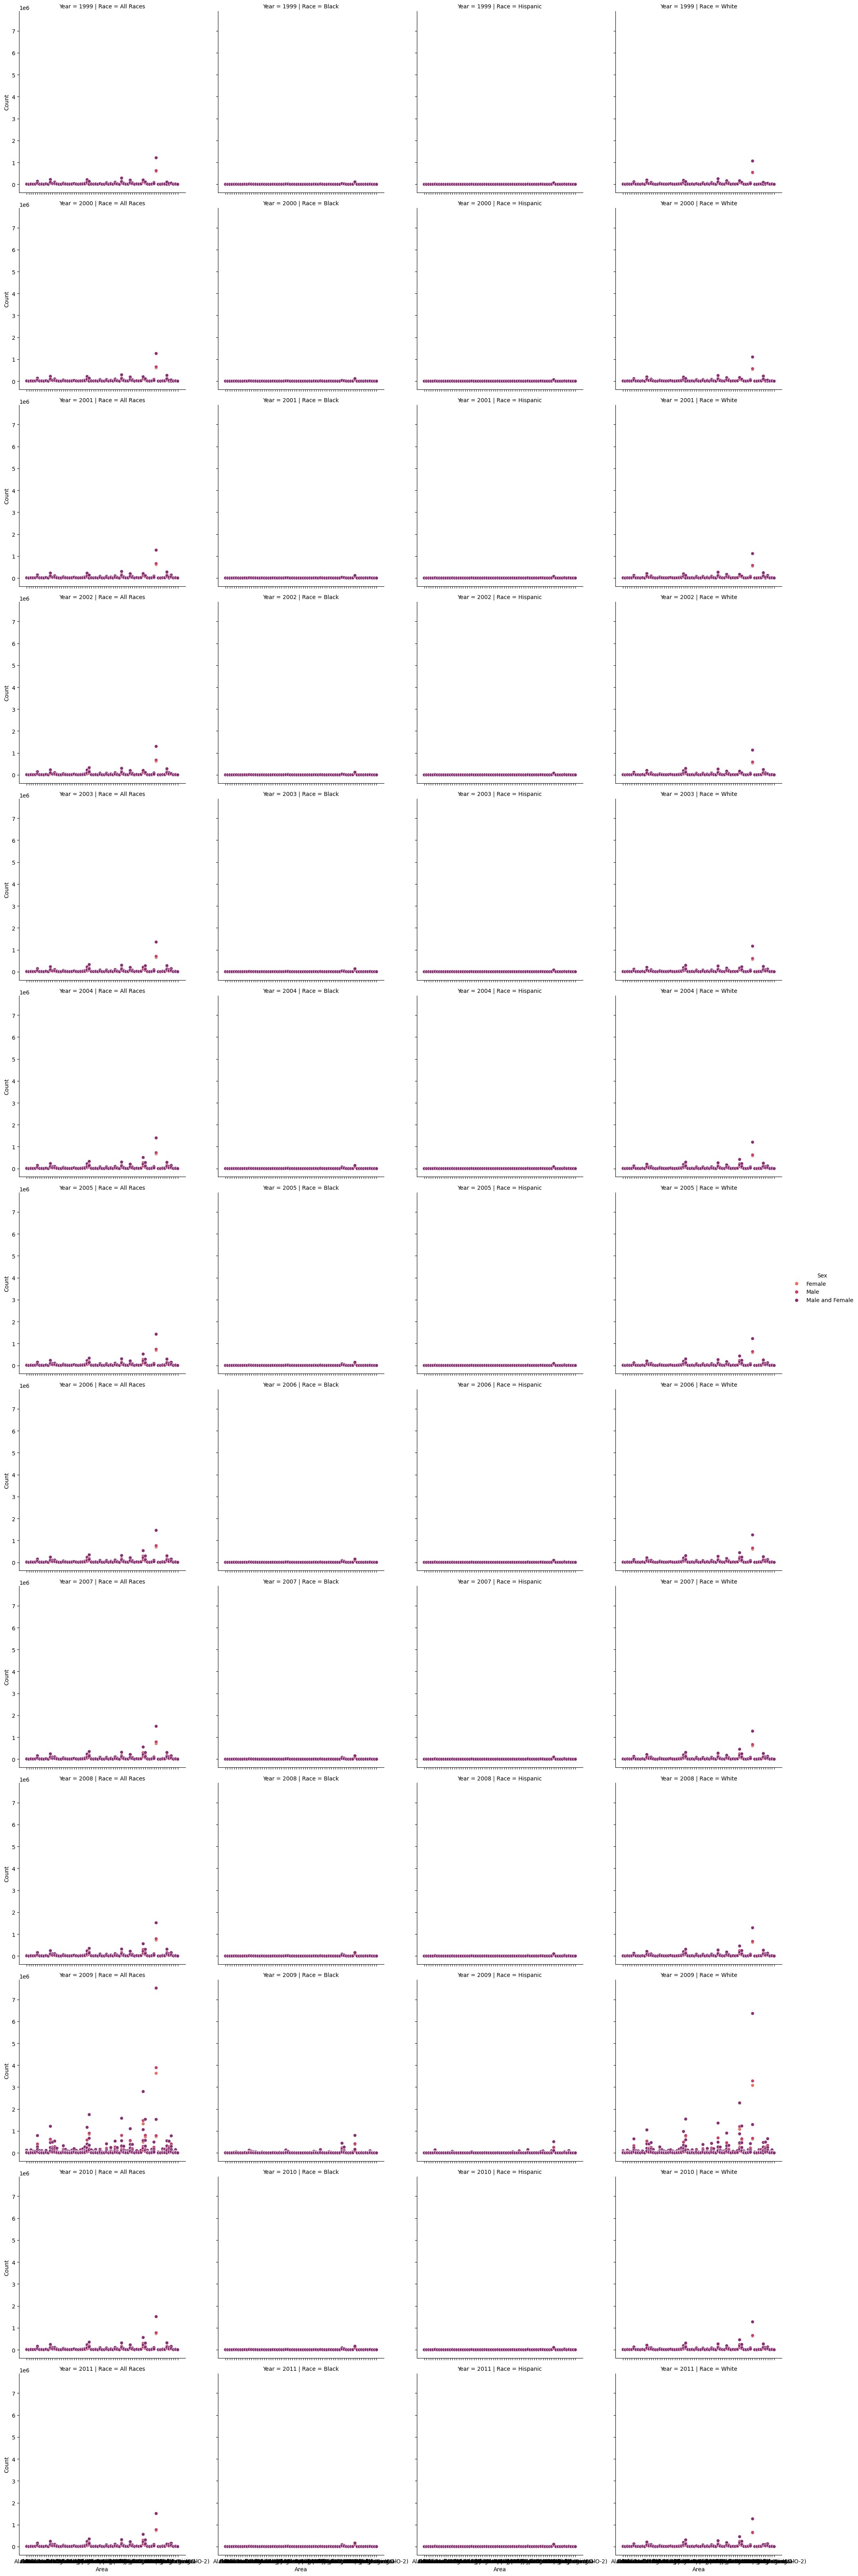

In [262]:
import pandas as pd

def plot_problem_bonus(df:pd.DataFrame) -> None:
    # Type your solution here
    sns.relplot(df, x = "Area", y = "Count", kind = "scatter", col = "Race", row = "Year", hue = "Sex", palette = "flare")

plot_problem_bonus(df)

# Discussion



## Discussion 1
Do you think a line chart is an effective visualization in problem 2.1? Explain in 1-2 sentences why or why not.






Answer: I think a line chart isn't an effective visualization in problem 2.1, because it lacks differentiation between different data points. It violates the rule of bad data, which is when data is presented in a certain way. 

## Discussion 2
What do you think are the limitations of this dataset?

Answer: The limitations of this dataset could be the races, since there is only 3 different races which is lower than the actual amount of races in the world.